In [9]:
from EDA import *
from Data_Preprocessing import *
from Models import *
from Evaluation import *

In [10]:
df = load_data('Dataset/Tasla_Stock_Updated_V2.csv')

In [11]:
df_train, df_test = split_data(df)

In [12]:
df_train=create_features(df_train)
df_test=create_features(df_test)

In [13]:
df_full = create_features(df)

In [14]:
features_to_scale = ['Close', 'Monthly_Return', 'MA5', 'MA10', 'MA20', 'Volatility_5', 'Volatility_10', 'Volatility_20']
df_train_scaled, df_test_scaled, fitted_scaler = scale_features(df_train, df_test, features_to_scale)

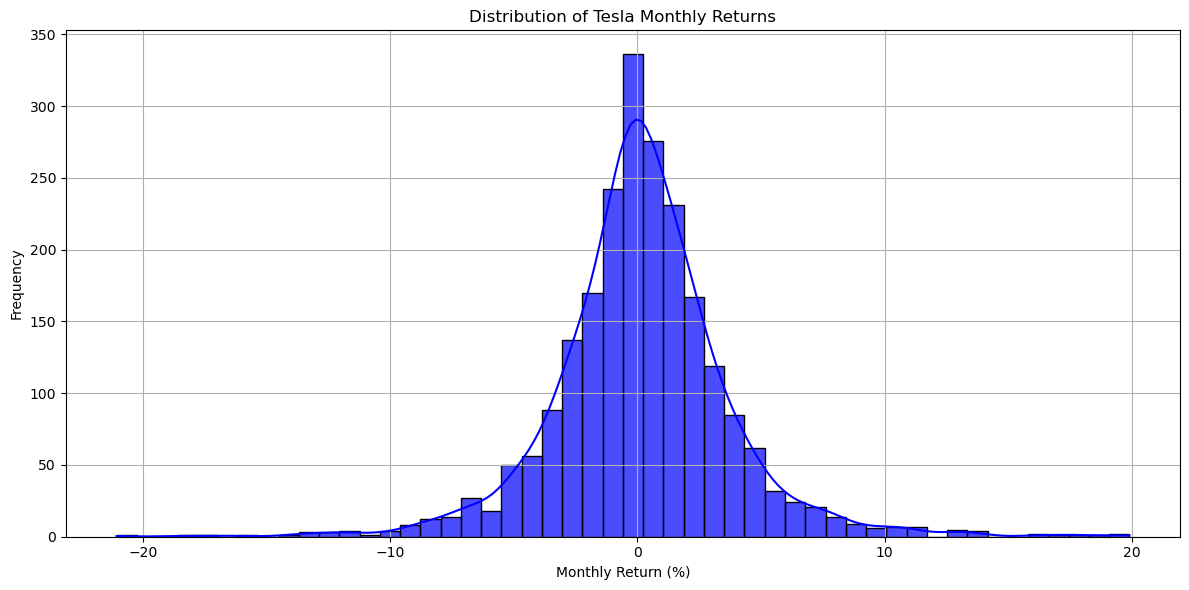

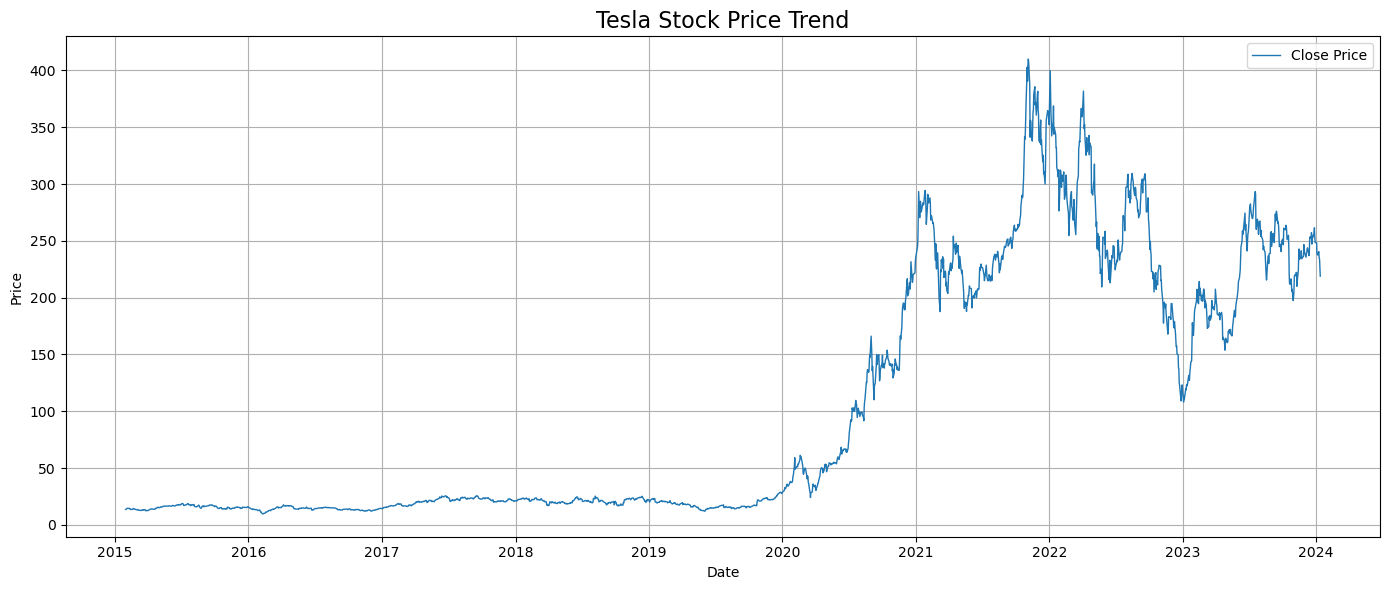

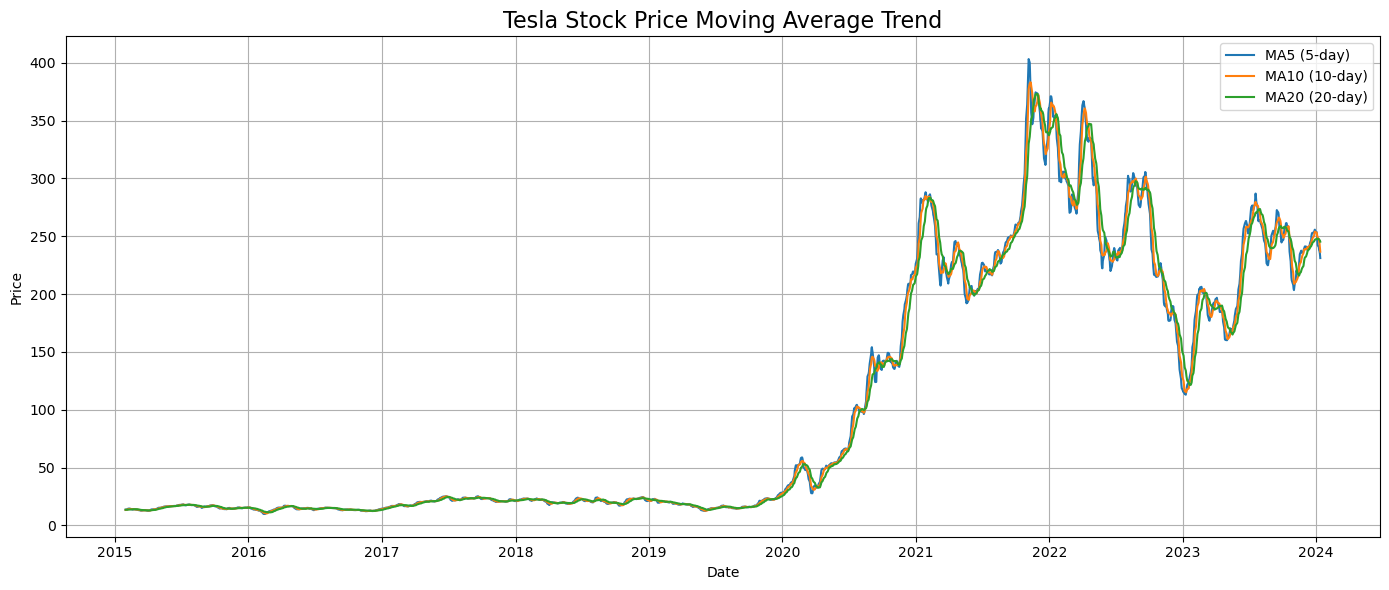

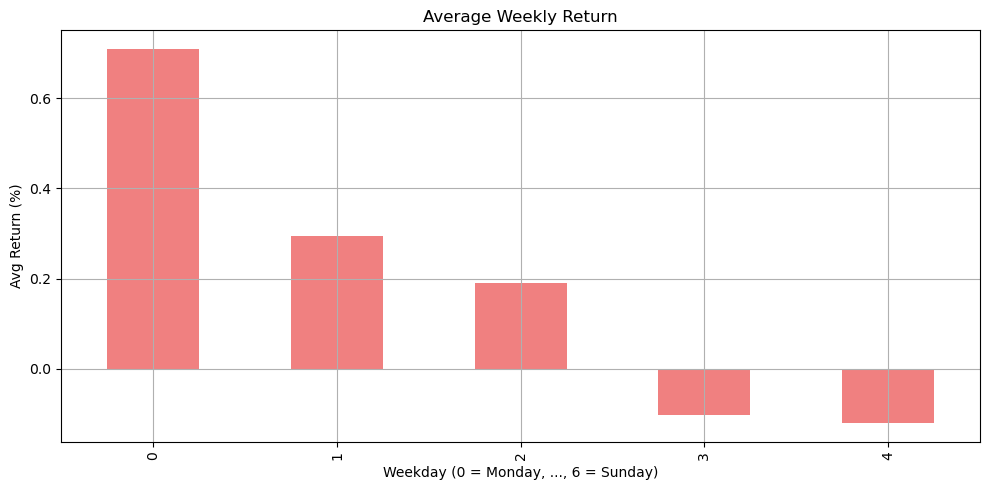

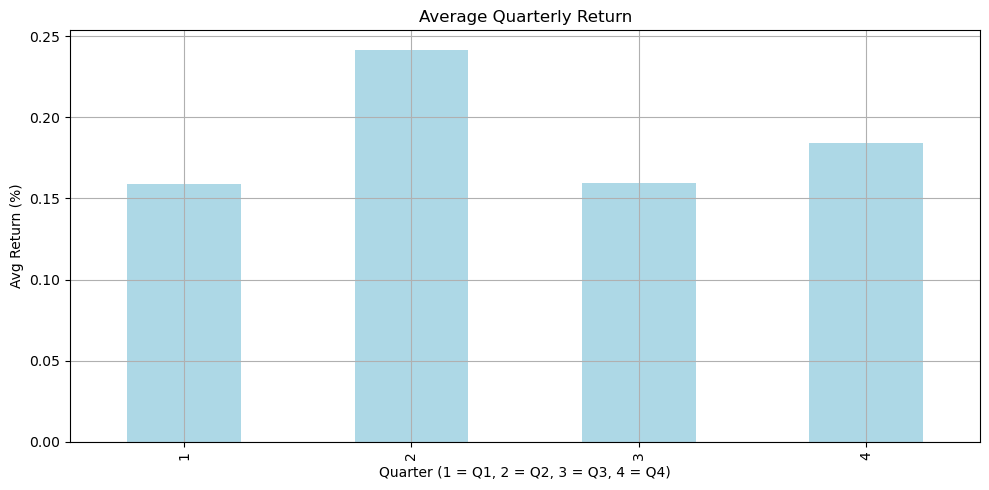

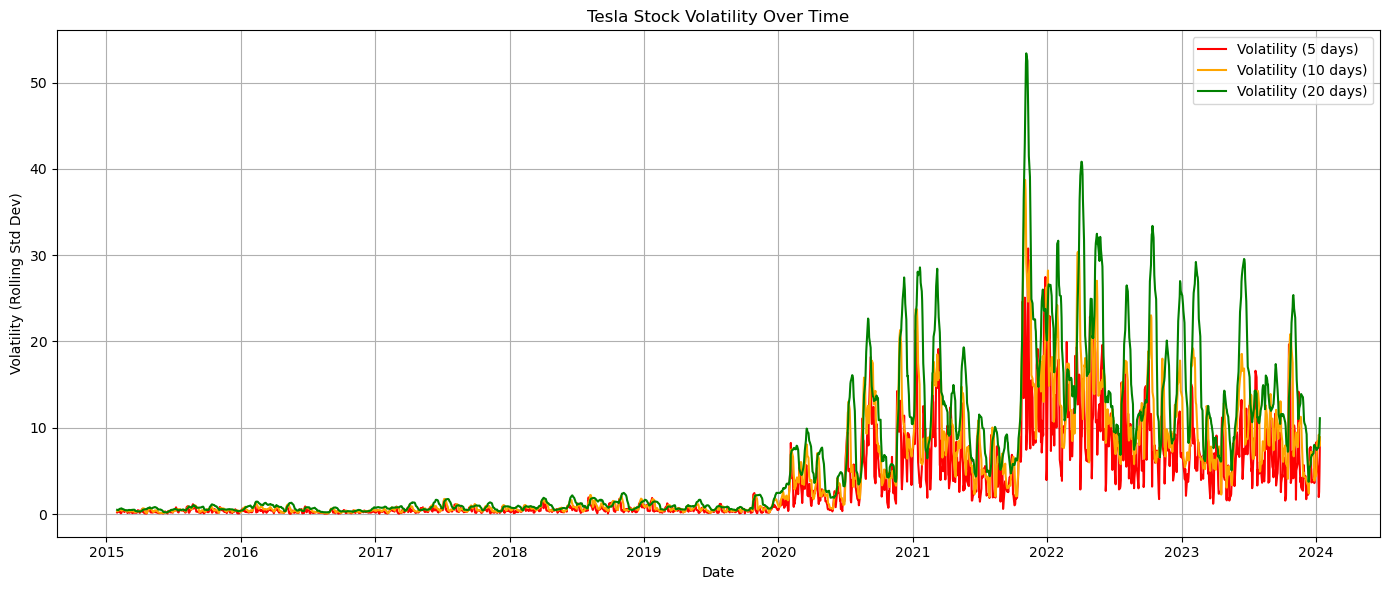

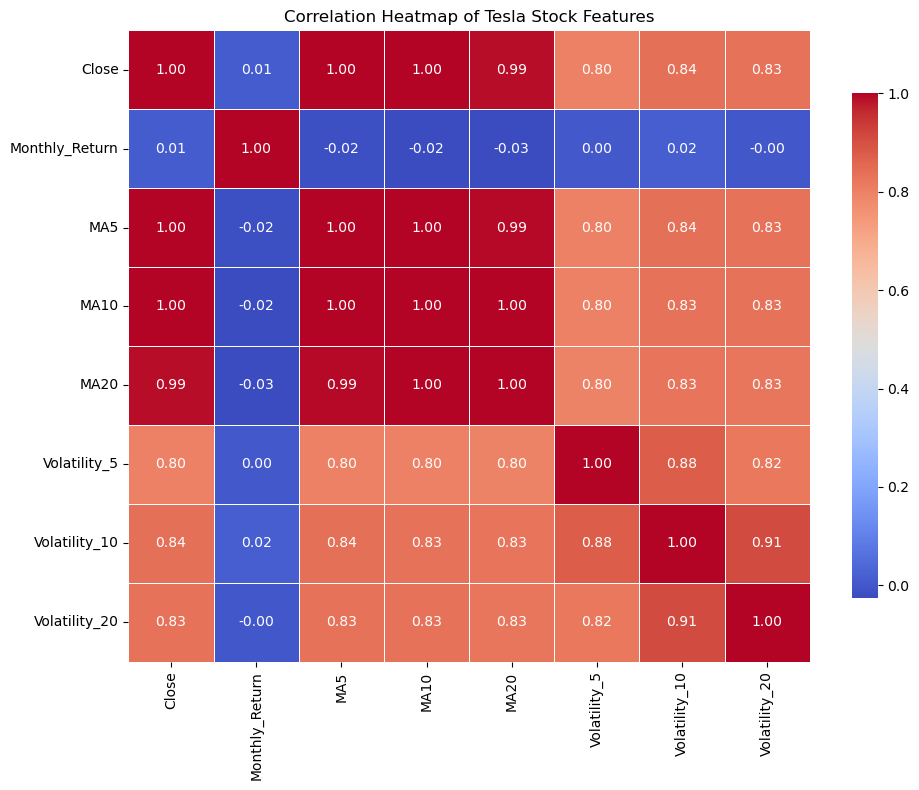

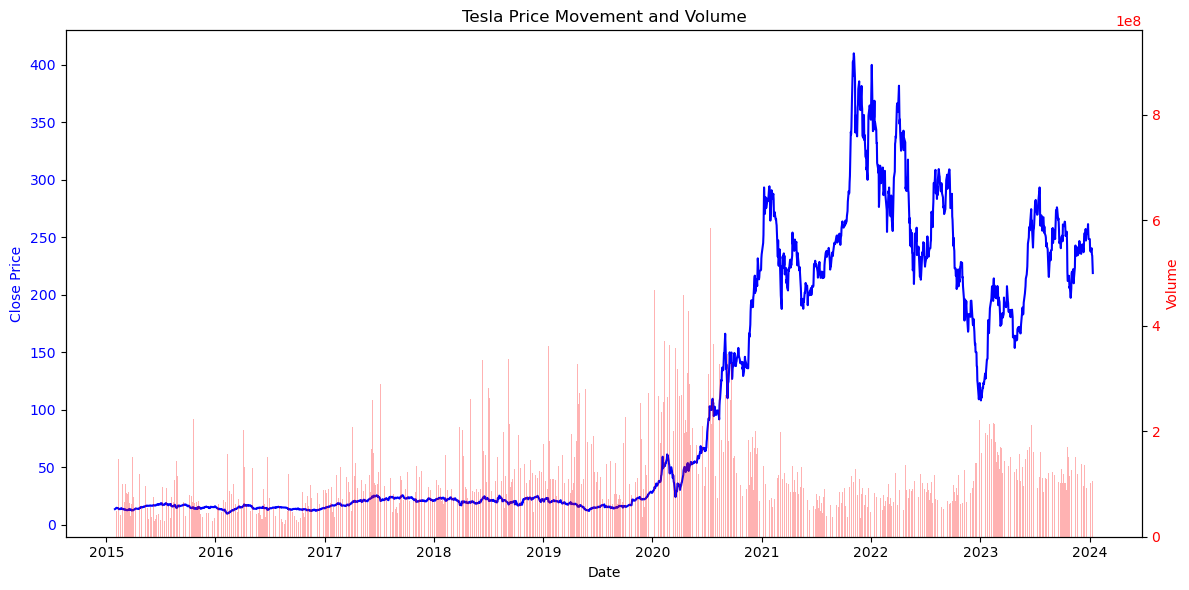

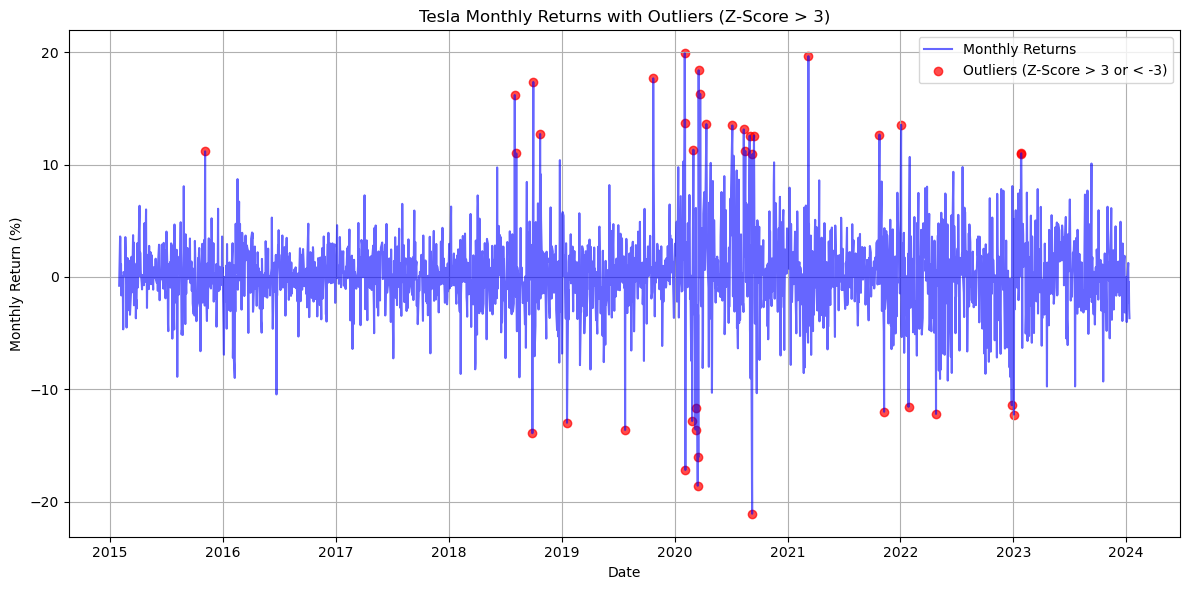

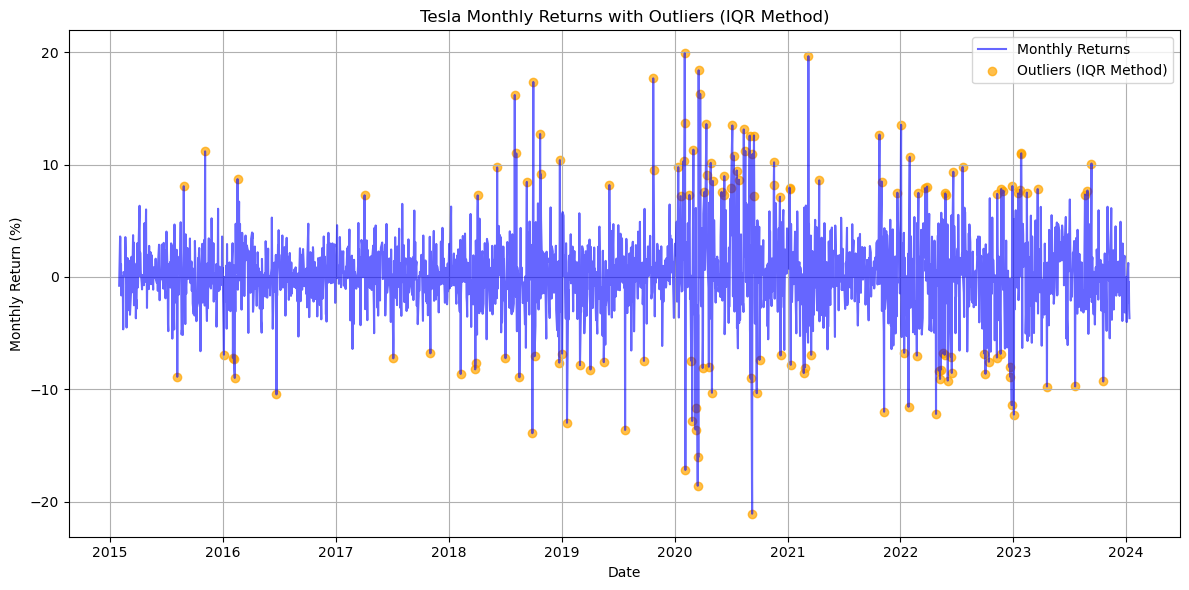

Sharpe Ratio: 0.0519


/Users/rakibabdullah/Desktop/Tesla-S/EDA.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_Return'] = (1 + df['Daily_Return'] / 100).cumprod() - 1
/Users/rakibabdullah/Desktop/Tesla-S/EDA.py:144: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').last()


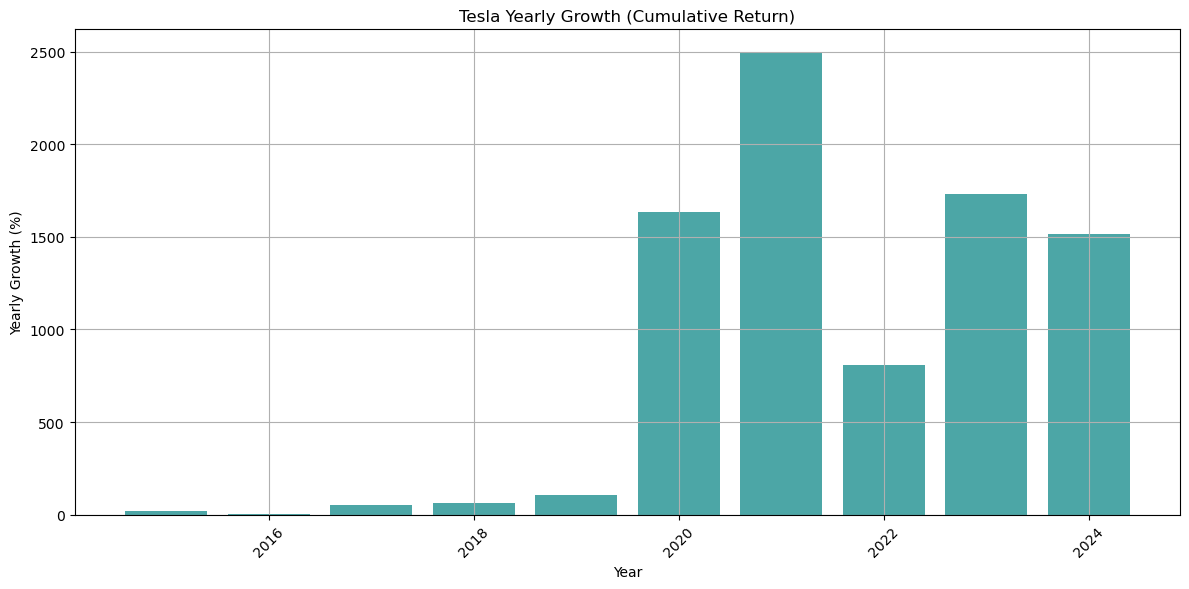

In [15]:
plot_monthly_return_distribution(df_full)
plot_stock_price_trend(df_full)
plot_moving_averages(df_full)
plot_weekly_avg_return(df_full)
plot_quarterly_seasonality(df_full)
plot_volatility(df_full)
plot_correlation_heatmap(df_full)
plot_volume_vs_price(df_full)
plot_zscore_outliers(df_full)
plot_iqr_outliers(df_full)
calculate_sharpe_ratio(df_full)
plot_cumulative_returns(df_full)



Model Evaluation Metrics:
Mean Absolute Error (MAE): 5.3310
Mean Squared Error (MSE): 51.0199
Root Mean Squared Error (RMSE): 7.1428
R-squared (R²): 0.9836
Mean Absolute Percentage Error (MAPE): 2.1779%




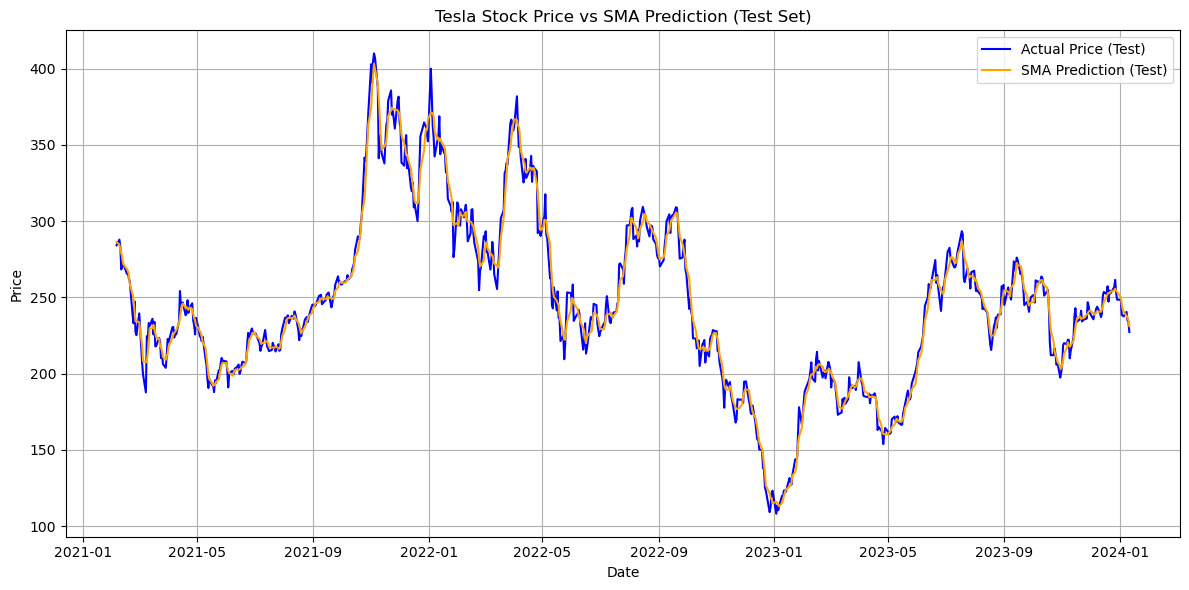

In [16]:
# Apply Simple Moving Average (SMA) to the test set
df_test['SMA_Prediction'] = simple_moving_average(df_test, window=5)

df_test.dropna(inplace=True)

evaluate_model(df_test['Close'], df_test['SMA_Prediction'])
plot_simple_moving_average(df_test)